<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Official-example" data-toc-modified-id="Official-example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Official example</a></span></li><li><span><a href="#Jupyter-magic" data-toc-modified-id="Jupyter-magic-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Jupyter magic</a></span></li><li><span><a href="#module:-bq_helper" data-toc-modified-id="module:-bq_helper-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>module: bq_helper</a></span></li><li><span><a href="#module:-pandas-gbq" data-toc-modified-id="module:-pandas-gbq-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>module: pandas-gbq</a></span><ul class="toc-item"><li><span><a href="#use-lru-cache" data-toc-modified-id="use-lru-cache-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>use lru cache</a></span></li></ul></li><li><span><a href="#Public-data-query-example:-nypd-motor-vehicle-collision" data-toc-modified-id="Public-data-query-example:-nypd-motor-vehicle-collision-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Public data query example: nypd motor vehicle collision</a></span></li></ul></div>

# Introduction
- setup instructions: https://cloud.google.com/bigquery/docs/reference/libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

# Official example

In [2]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

query = """
    SELECT name, SUM(number) as total_people
    FROM `bigquery-public-data.usa_names.usa_1910_2013`
    WHERE state = 'TX'
    GROUP BY name, state
    ORDER BY total_people DESC
    LIMIT 20
"""
query_job = client.query(query)  # Make an API request.

print("The query data:")
for row in query_job:
    # Row values can be accessed by field name or index.
    print("name={}, count={}".format(row[0], row["total_people"]))

The query data:
name=James, count=272793
name=John, count=235139
name=Michael, count=225320
name=Robert, count=220399
name=David, count=219028
name=Mary, count=209893
name=William, count=173092
name=Jose, count=157362
name=Christopher, count=144196
name=Maria, count=131056
name=Charles, count=126509
name=Daniel, count=117470
name=Richard, count=109888
name=Juan, count=109808
name=Jennifer, count=98696
name=Joshua, count=90679
name=Elizabeth, count=90465
name=Joseph, count=89097
name=Matthew, count=88464
name=Joe, count=87977


In [28]:
# https://cloud.google.com/bigquery/docs/visualize-jupyter
# run a query to retrieve the annual count of plural births by
# plurality (2 for twins, 3 for triplets, and so on).
sql = """
SELECT
    plurality,
    COUNT(1) AS count,
    year
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(plurality) AND plurality > 1
GROUP BY
    plurality, year
ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()


/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)


,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


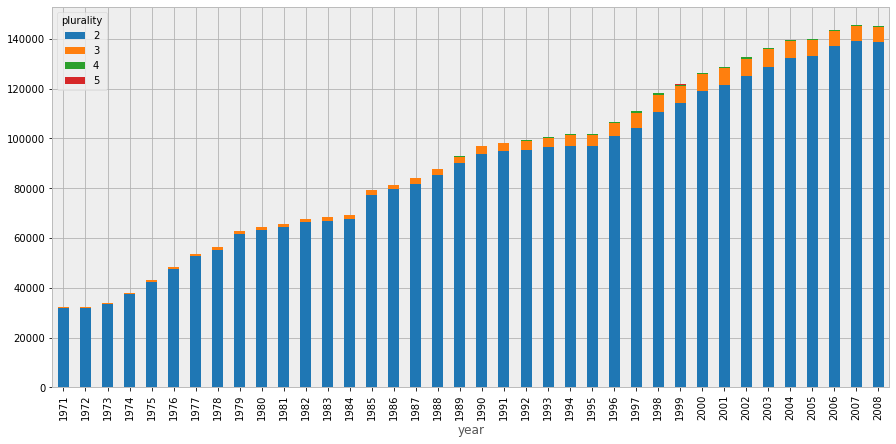

In [29]:
pivot_table = df.pivot(index="year", columns="plurality", values="count")
pivot_table.plot(kind="bar", stacked=True, figsize=(15, 7))

In [30]:
# count of births by the number of gestation weeks.
sql = """
SELECT
    gestation_weeks,
    COUNT(1) AS count
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
GROUP BY
    gestation_weeks
ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

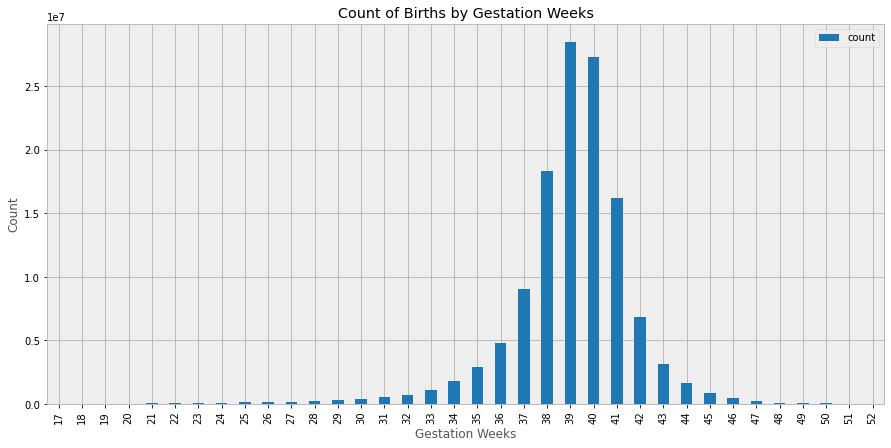

In [31]:
ax = df.plot(kind="bar", x="gestation_weeks", y="count",
             figsize=(15, 7))
ax.set_title("Count of Births by Gestation Weeks")
ax.set_xlabel("Gestation Weeks")
ax.set_ylabel("Count")

In [33]:
# Personal datasets

In [32]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

datasets = list(client.list_datasets())  # Make an API request.
project = client.project

if datasets:
    print("Datasets in project {}:".format(project))
    for dataset in datasets:
        print("\t{}".format(dataset.dataset_id))
else:
    print("{} project does not contain any datasets.".format(project))

analog-signal-250501 project does not contain any datasets.


# Jupyter magic
- https://googleapis.dev/python/bigquery/latest/magics.html

In [3]:
%load_ext google.cloud.bigquery

In [4]:
%%bigquery

SELECT name, SUM(number) as count
FROM `bigquery-public-data.usa_names.usa_1910_current`
GROUP BY name
ORDER BY count DESC
LIMIT 3

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)


,name,count
0,James,5015584
1,John,4885284
2,Robert,4749154


In [5]:
params = {"num": 5}

In [6]:
%%bigquery --params $params

SELECT name, SUM(number) as count
FROM `bigquery-public-data.usa_names.usa_1910_current`
GROUP BY name
ORDER BY count DESC
LIMIT @num

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)


,name,count
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134


# module: bq_helper
- https://www.kaggle.com/bhishanpdl/introduction-to-the-bq-helper-package-7ec5a5/edit

In [7]:
from bq_helper import BigQueryHelper

In [8]:
bq_assistant = BigQueryHelper("bigquery-public-data", "openaq")

In [9]:
bq_assistant.list_tables()

['global_air_quality']

In [10]:
bq_assistant.head("global_air_quality", num_rows=3)

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


In [11]:
bq_assistant.table_schema("global_air_quality")

,name,type,mode,description
0,location,STRING,NULLABLE,Location where data was measured
1,city,STRING,NULLABLE,City containing location
2,country,STRING,NULLABLE,Country containing measurement in 2 letter ISO...
3,pollutant,STRING,NULLABLE,Name of the Pollutant being measured. Allowed ...
4,value,FLOAT,NULLABLE,Latest measured value for the pollutant
5,timestamp,TIMESTAMP,NULLABLE,The datetime at which the pollutant was measur...
6,unit,STRING,NULLABLE,The unit the value was measured in coded by UC...
7,source_name,STRING,NULLABLE,Name of the source of the data
8,latitude,FLOAT,NULLABLE,Latitude in decimal degrees. Precision >3 deci...
9,longitude,FLOAT,NULLABLE,Longitude in decimal degrees. Precision >3 dec...


In [12]:
QUERY = "SELECT location, timestamp, pollutant FROM `bigquery-public-data.openaq.global_air_quality`"

In [13]:
bq_assistant.estimate_query_size(QUERY) 

0.0005448907613754272

In [14]:
df = bq_assistant.query_to_pandas(QUERY)
df.head(2)

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)


,location,timestamp,pollutant
0,"BTM Layout, Bengaluru - KSPCB",2018-02-22 03:00:00+00:00,co
1,"BTM Layout, Bengaluru - KSPCB",2018-02-22 03:00:00+00:00,no2


# module: pandas-gbq
- https://github.com/pydata/pandas-gbq

In [15]:
import pandas_gbq

In [16]:
sql = """
SELECT country_name, alpha_2_code
FROM [bigquery-public-data:utility_us.country_code_iso]
WHERE alpha_2_code LIKE 'Z%'
"""
df = pandas_gbq.read_gbq(sql,dialect="legacy")

df

Downloading:   0%|          | 0/3 [00:00<?, ?rows/s]/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)
Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.60rows/s]


,country_name,alpha_2_code
0,Zambia,ZM
1,Zimbabwe,ZW
2,South Africa,ZA


## use lru cache

In [17]:
import functools

In [18]:
@functools.lru_cache(maxsize=1024)
def get_data():
    sql = """
    SELECT country_name, alpha_2_code
    FROM [bigquery-public-data:utility_us.country_code_iso]
    WHERE alpha_2_code LIKE 'Z%'
    """
    df = pandas_gbq.read_gbq(sql,dialect="legacy")

    return df

In [19]:
# data is downloaded only first time we call the function.
df = get_data()
df

Downloading:   0%|          | 0/3 [00:00<?, ?rows/s]/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)
Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.63rows/s]


,country_name,alpha_2_code
0,Zambia,ZM
1,Zimbabwe,ZW
2,South Africa,ZA


In [20]:
# this time it doesnot download the data
df = get_data()
df

,country_name,alpha_2_code
0,Zambia,ZM
1,Zimbabwe,ZW
2,South Africa,ZA


# Public data query example: nypd motor vehicle collision

In [26]:
%%bigquery
SELECT *
FROM
  `bigquery-public-data.new_york.nypd_mv_collisions`
LIMIT 5

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_schema is deprecated as of 0.17.0, please use pyarrow.ipc.read_schema instead
  warnings.warn(msg, FutureWarning)
/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.read_record_batch is deprecated as of 0.17.0, please use pyarrow.ipc.read_record_batch instead
  warnings.warn(msg, FutureWarning)


,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,QUEENS,Outside Car Distraction,Unspecified,,,,GREENWAY SOUTH,2018-01-17 10:35:00+00:00,40.710400,-73.839740,...,0,,UNION TURNPIKE,3830694,SPORT UTILITY / STATION WAGON,AM,,,,11375
1,MANHATTAN,Fatigued/Drowsy,Other Vehicular,,,,3 AVENUE,2015-05-08 17:30:00+00:00,40.780125,-73.953034,...,0,,EAST 88 STREET,3216563,PASSENGER VEHICLE,MOTORCYCLE,,,,10128
2,QUEENS,Driver Inattention/Distraction,Unspecified,,,,,2017-11-22 07:15:00+00:00,40.685524,-73.844600,...,0,99-08 97 STREET,,3795174,PASSENGER VEHICLE,CONV,,,,11416
3,BRONX,Turning Improperly,Unspecified,,,,WESTCHESTER AVENUE,2017-12-05 07:30:00+00:00,40.832650,-73.863660,...,0,,LELAND AVENUE,3803160,PASSENGER VEHICLE,BU,,,,10472
4,BRONX,Driver Inattention/Distraction,Unspecified,,,,,2017-11-03 09:22:00+00:00,40.853233,-73.891750,...,0,4487 3 AVENUE,,3794016,PASSENGER VEHICLE,TK,,,,10457


In [36]:
url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url,nrows=5)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/26/2017,22:00,MANHATTAN,10002.0,40.718270,-73.99072,POINT (-73.99072 40.71827),ALLEN STREET,BROOME STREET,NaN,...,Unspecified,NaN,NaN,NaN,3699702,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1,07/14/2017,13:17,NaN,NaN,40.783180,-73.94362,POINT (-73.94362 40.78318),FDR DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3712558,Taxi,Sedan,NaN,NaN,NaN
2,07/04/2017,14:00,BRONX,10462.0,40.833557,-73.85774,POINT (-73.85774 40.833557),WESTCHESTER AVENUE,PUGSLEY AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3705809,Sedan,Sedan,NaN,NaN,NaN
3,07/17/2017,21:03,MANHATTAN,10032.0,40.833843,-73.94851,POINT (-73.94851 40.833843),RIVERSIDE DRIVE,WEST 155 STREET,NaN,...,NaN,NaN,NaN,NaN,3713274,Sedan,NaN,NaN,NaN,NaN
4,06/26/2017,15:35,BROOKLYN,11203.0,40.654434,-73.92139,POINT (-73.92139 40.654434),REMSEN AVENUE,LINDEN BOULEVARD,NaN,...,Driver Inexperience,NaN,NaN,NaN,3702089,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
